In [1]:
import textwrap
from os import mkdir
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import openpyxl as xl
import pandas as pd
from matplotlib.ticker import (  # ScalarFormatter,; FixedFormatter,; NullFormatter,
    FixedLocator,
    LogLocator,
    MultipleLocator,
)
from project_path import ROOT_DIR

plt.style.use("default")

In [2]:
df_scenarios = pd.read_excel(r"../data/interim/results_scenario_table.xlsx", header=2, index_col=0).T
df_scenarios

cycle_number,Homogeneous,Heterogeneous
1,70.332673,5.609766
2,37.430790,5.251403
4,20.979849,5.072222
6,15.496202,5.012495
8,12.754378,4.982631
10,11.109284,4.964713
20,7.819096,4.928877
30,6.722366,4.916932
40,6.174002,4.910959
50,5.844983,4.907375


In [3]:
pngFilesDir = Path(
    ROOT_DIR, r"data/processed/png_files"
)  # full path to folder w/png files
svgFilesDir = Path(
    ROOT_DIR, r"data/processed/svg_files"
)  # full path to folder w/svg files

# Generate required folders if needed
if not Path.exists(pngFilesDir):
    mkdir(pngFilesDir)
if not Path.exists(svgFilesDir):
    mkdir(svgFilesDir)

Preliminary colors:<br>

<b style="background-color: #ef8a62;">heterogeneous</b><br>  
<b style="background-color: #67a9cf;">homogeneous</b><br>



In [4]:
## BAR CHART colors

allcolors = {
    "heterogeneous": "#ef8a62",
    "homogeneous": "#67a9cf",
}

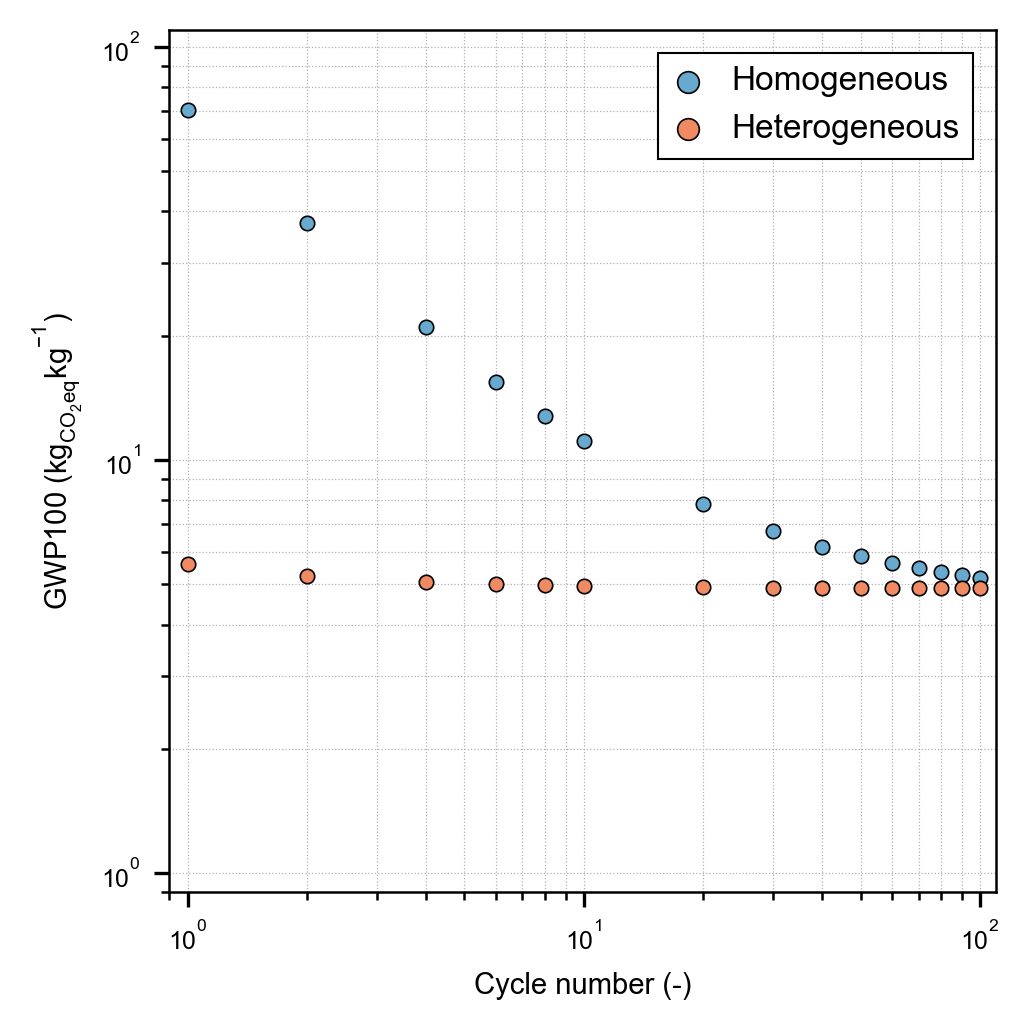

In [5]:
# Plot

# Figure specifications (fonts, sizes, figsize, etc.)
size_legend_font = 8
size_tick_font = 6
size_label_font = 7
mpl.rc("xtick", labelsize=size_tick_font)
mpl.rc("ytick", labelsize=size_tick_font)
mpl.rc("axes", labelsize=size_label_font, linewidth=0.6)
mpl.rc("font", family="Arial")
# mpl.rc('text', usetex=True) # no LaTex on this machine
mpl.rc("mathtext", default="regular")
# mpl.rc('lines', )
# mpl.rc('markers', )
marker_style = dict(lw=0, marker="D", ms=1.5, mec="r", mfc="none", mew=0.7)

# Size of the figure
size_in_mm = (85, 85)  # input the desired size in mm (width, height)

# Variables to define figure's empty space from its borders to the spines of the axes
from_left = 13  # in mm
from_right = 2  # in mm
from_bottom = 10  # in mm
from_top = 2  # in mm

fig = plt.figure(
    figsize=[x / 25.4 for x in size_in_mm],
    dpi=300,
    #  tight_layout = {'pad': 0}
)

gs = fig.add_gridspec(
    nrows=1,
    ncols=1,
    #     width_ratios=[1, 1, 1],
    # height_ratios=[0.86, 0.16],
    #     wspace=0.15,
    # hspace=0.005,
    top=1 - from_top / size_in_mm[1],
    bottom=from_bottom / size_in_mm[1],
    left=from_left / size_in_mm[0],
    right=1 - from_right / size_in_mm[0],
)

ax = fig.add_subplot(gs[0])

## Scatter plot ################################################################
cycle_num = df_scenarios.index.values.tolist()

ax.set_xlabel("Cycle number (-)")
ax.set_ylabel("GWP100 ($kg_{CO_{2}eq} kg^{-1}$)")

ax.scatter(
    cycle_num,
    df_scenarios.Homogeneous,
    s=12,
    edgecolors="k",
    linewidth=0.4,
    color=[v for v in allcolors.values()][1],
    label=df_scenarios.columns[0],
)
ax.scatter(
    cycle_num,
    df_scenarios.Heterogeneous,
    s=12,
    edgecolors="k",
    linewidth=0.4,
    color=[v for v in allcolors.values()][0],
    label=df_scenarios.columns[1],
)
ax.set_xscale("log")
ax.set_yscale("log")
# ax.grid(True)
ax.xaxis.grid(True, which="both", ls=":", lw=0.3)
ax.yaxis.grid(True, which="both", ls=":", lw=0.3)
ax.set_axisbelow(True)
ax.set_xlim([0.9, 110])
ax.set_ylim([0.9, 110])
# ax.yaxis.set_major_locator(LogLocator(base=10, numticks=10))

# # LEGEND
handles, labels = ax.get_legend_handles_labels()
lg = fig.legend(
    handles,
    labels,
    frameon=True,
    loc="upper right",
    fancybox=False,
    framealpha=1,
    edgecolor="k",
    borderpad=0.4,
    #    borderaxespad=0.5,
    bbox_to_anchor=(0.97, 0.97),
    ncol=1,
    markerscale=1.5,
    handlelength=1,
    fontsize=size_legend_font,
)
lg.get_frame().set_linewidth(0.5)

figNamePNG = "scatter_sensitivity.png"
figNameSVG = "scatter_sensitivity.svg"

plt.savefig(str(pngFilesDir / figNamePNG))  # export fig as png
plt.savefig(str(svgFilesDir / figNameSVG))  # export fig as svg